<a href="https://colab.research.google.com/github/ambrish-awasthi/handson-ML/blob/master/linear_model_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as npy
import sklearn.linear_model
import sklearn.neighbors


In [0]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.head(2);
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]



  LOCATION    Country INDICATOR  ... Value Flag Codes            Flags
0      AUS  Australia   HO_BASE  ...   1.1          E  Estimated value
1      AUT    Austria   HO_BASE  ...   1.0        NaN              NaN
2      BEL    Belgium   HO_BASE  ...   2.0        NaN              NaN
3      CAN     Canada   HO_BASE  ...   0.2        NaN              NaN

[4 rows x 17 columns]
       Country  ... Estimates Start After
0  Afghanistan  ...                2013.0
1      Albania  ...                2010.0
2      Algeria  ...                2014.0
3       Angola  ...                2014.0

[4 rows x 7 columns]


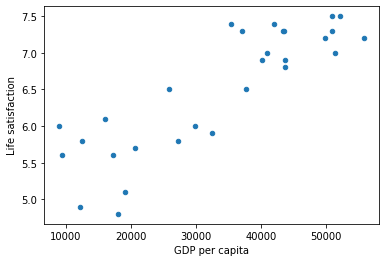

In [57]:
oecd_bli=pd.read_csv('https://raw.githubusercontent.com/ambrish-awasthi/handson-ML/master/dataset/lifestats/oecd_bli_2015.csv', thousands=',');
gdp_per_capita=pd.read_csv('https://raw.githubusercontent.com/ambrish-awasthi/handson-ML/master/dataset/lifestats/gdp_per_capita.csv',thousands=','
            , encoding='latin1', delimiter='\t',na_values='n/a');
print(oecd_bli.head(4));
print(gdp_per_capita.head(4));
country_stats_data=prepare_country_stats(oecd_bli, gdp_per_capita);
X=npy.c_[country_stats_data["GDP per capita"]];
Y=npy.c_[country_stats_data["Life satisfaction"]]
country_stats_data.plot(kind="scatter", x="GDP per capita",y="Life satisfaction")

In [58]:
model = sklearn.linear_model.LinearRegression();
model.fit(X,Y);

print(model.predict([[22587]]));

[[5.96242338]]


In [64]:
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(X,Y);

print(model.predict([[22587]]));

[[5.76666667]]
